In [80]:
%matplotlib inline

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import rfft, rfftfreq
import pandas as pd
from scipy.stats import skew, kurtosis

In [2]:
from scipy.misc import electrocardiogram
ecg = electrocardiogram()

In [3]:
ecg

array([-0.245, -0.215, -0.185, ..., -0.405, -0.395, -0.385])

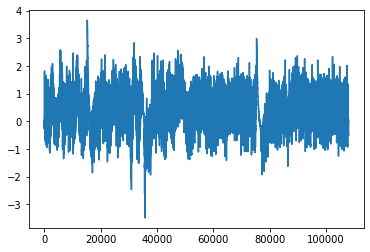

In [4]:
plt.plot(ecg)
plt.show()

In [5]:
ecg_r = ecg[4465:4505]
ecg_non_r = ecg[4350:4390]

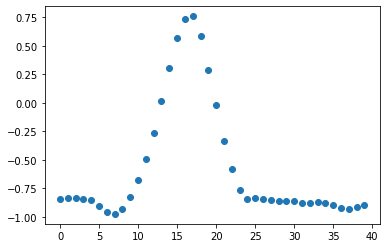

In [6]:
plt.plot(ecg_r, 'o')
plt.show()

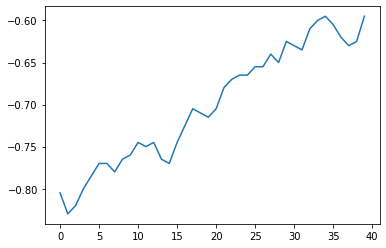

In [7]:
plt.plot(ecg_non_r)
plt.show()

In [25]:
x = ecg_r.copy()

In [58]:
def power(x, fs = 360):

    N = len(x)
    T = 1.0 / fs
    yf = rfft(x)
    xf = rfftfreq(N, T)[:N//2]

    df = pd.DataFrame()
    df['amp'] = yf[:-1]
    df['freq'] = xf
    value = df[(df['freq'] >= 5) & (df['freq'] <= 25)]['amp'].sum()

    return np.real(value)

In [32]:
def slewrate(x):
    max_ind = np.where(x == max(x))[0][0]
    value = np.abs(x[max_ind] - x[max_ind - 5])
    return value

In [33]:
def sweep(x):
    value = abs(max(x) - min(x))
    return value

In [34]:
def stats(x):
    m = np.mean(x)
    s = np.std(x)
    v = np.var(x)
    k = kurtosis(x)
    sk = skew(x)
    
    return m, s, v, k, sk
    
    

In [38]:
def get_features(x):

    temp = pd.DataFrame()
    p = power(x)
    sl = slewrate(x)
    sw = sweep(x)
    m, s, v, k, sk = stats(x)
    temp['power'] = [p]
    temp['slewrate'] = [sl]
    temp['sweep'] = [sw]
    temp['m'] = [m]
    temp['s'] = [s]
    temp['v'] = [v]
    temp['k'] = [k]
    temp['sk'] = [sk]

    return temp

In [59]:
df = pd.DataFrame()
for i in range(0, len(ecg)-40, 40):
    
    x = ecg[i:i+40]
    temp_df = get_features(x)
    df = df.append(temp_df)

In [63]:
df_v1 = (df - df.max())/(df.min() - df.max())

In [64]:
df_v1

power  slewrate     sweep         m         s         v         k  \
0   0.475006  0.992701  0.982812  0.653499  0.990444  0.999700  0.938358   
0   0.477327  0.983577  0.920312  0.635530  0.920053  0.991990  0.986897   
0   0.426614  0.788321  0.831250  0.628680  0.910628  0.990222  0.389971   
0   0.220759  0.589416  0.376562  0.580858  0.360565  0.586049  0.906350   
0   0.472449  0.972628  0.917187  0.629927  0.924075  0.992691  0.963332   
..       ...       ...       ...       ...       ...       ...       ...   
0   0.473981  0.990876  0.981250  0.675013  0.983737  0.999383  0.955442   
0   0.515616  0.994526  0.951563  0.658204  0.946492  0.996022  0.990842   
0   0.672111  0.666058  0.485937  0.619881  0.484902  0.729177  0.890118   
0   0.477008  0.981752  0.979688  0.665580  0.990384  0.999698  0.919922   
0   0.485123  0.990876  0.910937  0.629643  0.901705  0.988387  0.985714   

          sk  
0   0.652527  
0   0.639641  
0   0.177045  
0   0.450831  
0   0.574038  
..       ...  
0   0.710681  
0   0.643710  
0   0.437879  
0   0.646505  
0   0.665349  

[2699 rows x 8 columns]

In [65]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit_predict(df_v1)

In [68]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_v1)
pred = kmeans.predict(df_v1)


In [72]:
graph = []
for i in pred:
    for j in range(40):
        graph.append(i)

In [76]:
len(graph)

107960

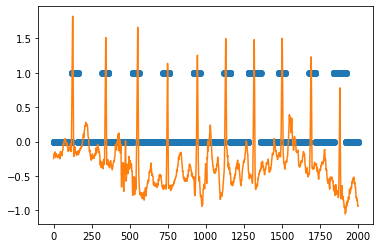

In [84]:
plt.plot(graph[:2000], 'o')
plt.plot(ecg[:2000])
plt.show()